In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = sns.load_dataset('iris')
titatic = sns.load_dataset('titanic')
mpg = sns.load_dataset('mpg')

# Q1. Iris

In [3]:
# 1-a
iris.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [4]:
iris.groupby('species').agg(['mean', 'std'])

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

<AxesSubplot:>

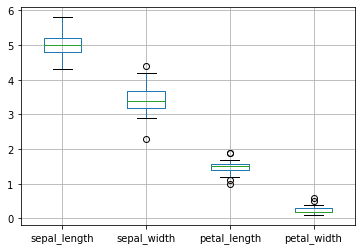

In [5]:
# 1-b) 이상치 제거
iris[iris.species == 'setosa'].boxplot()

In [6]:
s = iris[iris.species == 'setosa']['sepal_width'] # s == Series
q1, q3 = s.quantile(0.25), s.quantile(0.75) 
iqr = q3 - q1
q1, q3, iqr

(3.2, 3.6750000000000003, 0.4750000000000001)

In [7]:
s.mean(), s.std()

(3.428000000000001, 0.3790643690962886)

In [17]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
s[(s < lower_limit) | (s > upper_limit)] = np.nan # numpy의 boolean indexing
s.mean(), s.std(), s.isna().sum()

(2.5, 0.0, 47)

함수

**반복문** : 품종별(3개) * feature별(4개) --> nested for을 사용
    - for문

In [18]:
# 한 품종의 feature를 받아서 이상치를 제거하고 평균, 표준편차, 이상치 갯수를
    # 반환하는 함수
def get_newstat(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    s[(s < lower_limit) | (s > upper_limit)] = np.nan 
    return s.mean(), s.std(), s.isna().sum()

In [19]:
for species in iris.species.unique(): # ['setosa', 'versicolor', 'virginica']
    for column in iris.columns[:-1]:
        s = iris[iris.species == species][column]
        new_mean, new_std, outlier = get_newstat(s)
        print(species, column, new_mean, new_std, outlier)

setosa sepal_length 5.005999999999999 0.3524896872134512 0
setosa sepal_width 3.4312500000000004 0.32034306743094015 2
setosa petal_length 1.4608695652173913 0.12906201931985212 4
setosa petal_width 0.23333333333333328 0.08588298157855664 2
versicolor sepal_length 5.936 0.5161711470638635 0
versicolor sepal_width 2.7700000000000005 0.3137983233784114 0
versicolor petal_length 4.285714285714285 0.4377975178854565 1
versicolor petal_width 1.3259999999999998 0.197752680004544 0
virginica sepal_length 6.6224489795918355 0.593459246748267 1
virginica sepal_width 2.95531914893617 0.26027452951125174 3
virginica petal_length 5.552 0.5518946956639835 0
virginica petal_width 2.026 0.27465005563666733 0


In [28]:
line = []
for species in iris.species.unique(): 
    for column in iris.columns[:-1]:
        s = iris[iris.species == species][column]
        new_mean, new_std, outlier = get_newstat(s)
        line.append([species, column, new_mean, new_std, outlier])

df = pd.DataFrame(line, columns=['species', 'column', 'new_mean', 'new_std', 'outlier갯수'])
df

,species,column,new_mean,new_std,outlier갯수
0,setosa,sepal_length,5.006000,0.352490,0
1,setosa,sepal_width,3.431250,0.320343,2
2,setosa,petal_length,1.460870,0.129062,4
3,setosa,petal_width,0.233333,0.085883,2
4,versicolor,sepal_length,5.936000,0.516171,0
5,versicolor,sepal_width,2.770000,0.313798,0
6,versicolor,petal_length,4.285714,0.437798,1
7,versicolor,petal_width,1.326000,0.197753,0
8,virginica,sepal_length,6.622449,0.593459,1
9,virginica,sepal_width,2.955319,0.260275,3


In [32]:
line=[]
for species in iris.species.unique(): # ['setosa', 'versicolor', 'virginica']
    for column in iris.columns[:-1]:
        s = iris[iris.species == species][column]
        old_mean, old_std = s.mean(), s.std()
        new_mean, new_std, outlier = get_newstat(s)
        line.append([species, column, old_mean, old_std, outlier, new_mean, new_std])
              
df = pd.DataFrame(line, columns=['species', 'column', 'old_mean', 'old_std', 'outlier갯수', 'new_mean', 'new_std'])
df

,species,column,old_mean,old_std,outlier갯수,new_mean,new_std
0,setosa,sepal_length,5.006,0.352490,0,5.006000,0.352490
1,setosa,sepal_width,3.428,0.379064,2,3.431250,0.320343
2,setosa,petal_length,1.462,0.173664,4,1.460870,0.129062
3,setosa,petal_width,0.246,0.105386,2,0.233333,0.085883
4,versicolor,sepal_length,5.936,0.516171,0,5.936000,0.516171
5,versicolor,sepal_width,2.770,0.313798,0,2.770000,0.313798
6,versicolor,petal_length,4.260,0.469911,1,4.285714,0.437798
7,versicolor,petal_width,1.326,0.197753,0,1.326000,0.197753
8,virginica,sepal_length,6.588,0.635880,1,6.622449,0.593459
9,virginica,sepal_width,2.974,0.322497,3,2.955319,0.260275


In [20]:
x = iris[iris.species == 'setosa']
type(x)

pandas.core.frame.DataFrame

In [21]:
x['sepal_length']

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal_length, dtype: float64

In [22]:
ss = pd.Series([1,2,3,4,5,6,7,8])
ss[ss > 4]

4    5
5    6
6    7
7    8
dtype: int64

In [26]:
ss = pd.Series([1,2,3,4,5,6,7,8])
ss[ss < 3 | ss > 6]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [25]:
ss = pd.Series([1,2,3,4,5,6,7,8])   # numpy의 boolean indexing
ss[(ss < 3) | (ss > 6)]

0    1
1    2
6    7
7    8
dtype: int64

In [27]:
# 코드를 여러번 쓰게 되는 단점이 있다.
for element in ss:
    if (element < 3 or element > 6):
        print(element)

1
2
7
8


반복문, 함수, 자료구조 사용에 무리가 없을 정도로 익숙해져야 한다